<a href="https://colab.research.google.com/github/Kraljevic1111/ML-Project/blob/main/Notebook/products_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importng pandas, loading dataset products.csv and get fammiliar with the dataset

In [29]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/Kraljevic1111/ML-Project/main/data/products.csv"
df = pd.read_csv(url)

print("First 10 rows:")
print(df.head(10))
print("Number of rows,columns:")
print(df.shape)
print("INformation about dataset:")
print(df.info())


First 10 rows:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   
5           6  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            6   
6           7               apple iphone 8 plus 64 gb space grey            7   
7           8                apple iphone 8 plus 64gb space grey            8   
8           9                apple iphone 8 plus 64gb space grey            9   
9          10                apple iphone 8 plus 64gb space grey           10   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-

## Checking for missing values

In [30]:
#Checking for missing values per column
print("Missing values per column:")
missing_values = df.isna().sum()
print(missing_values)

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## Showing missing values via chart

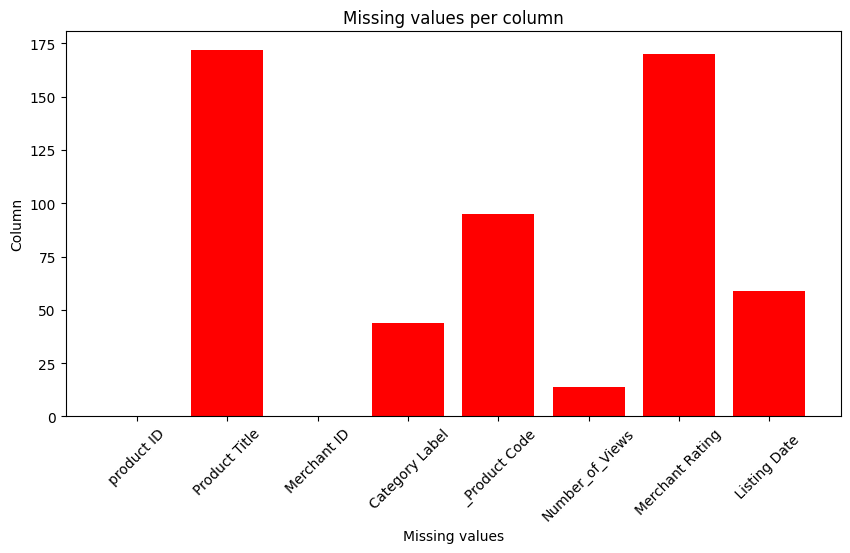

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.bar(missing_values.index,missing_values.values,color = "red")
plt.title("Missing values per column")
plt.xlabel("Missing values")
plt.ylabel("Column")
plt.xticks(rotation = 45)
plt.show()


## Analyzing columns Merchant rating and Number of Views too see if is there any correlation between them.

/tmp/ipython-input-2880503381.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,x = "Merchant Rating",y = "Number_of_Views",palette = "pastel")


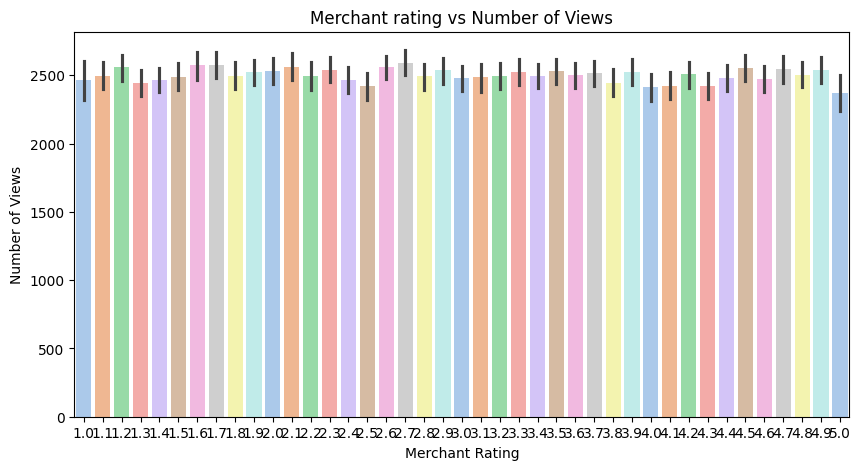

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.barplot(data = df,x = "Merchant Rating",y = "Number_of_Views",palette = "pastel")
plt.title("Merchant rating vs Number of Views")
plt.xlabel("Merchant Rating")
plt.ylabel("Number of Views")
plt.show()


## After analysis wee conclude taht there is not a relationship between this two columns in any way

## Analyzing column category label

In [33]:
#showing first 10 rows
print("Show first 10 rows:")
print(df['Product Title'].head(10))
#showing column type
print("Column type:")
print(df['Product Title'].dtype)
#checking for missing values in column Category Label
print("Missing values:")
print(df[' Category Label'].isna().sum())

Show first 10 rows:
0                      apple iphone 8 plus 64gb silver
1                  apple iphone 8 plus 64 gb spacegrau
2    apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...
3                  apple iphone 8 plus 64gb space grey
4    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
5    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
6                 apple iphone 8 plus 64 gb space grey
7                  apple iphone 8 plus 64gb space grey
8                  apple iphone 8 plus 64gb space grey
9                  apple iphone 8 plus 64gb space grey
Name: Product Title, dtype: object
Column type:
object
Missing values:
44


## Analyzing column Product Title

In [34]:

#showing first 10 rows
print("First 10 rows:")
print(df['Product Title'].head(10))
#showing missing values
print("Missing values:")
print(df['Product Title'].isna().sum())
#checking tyoe of column Product Price
print("Columns type:")
print(df['Product Title'].dtype)

First 10 rows:
0                      apple iphone 8 plus 64gb silver
1                  apple iphone 8 plus 64 gb spacegrau
2    apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...
3                  apple iphone 8 plus 64gb space grey
4    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
5    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
6                 apple iphone 8 plus 64 gb space grey
7                  apple iphone 8 plus 64gb space grey
8                  apple iphone 8 plus 64gb space grey
9                  apple iphone 8 plus 64gb space grey
Name: Product Title, dtype: object
Missing values:
172
Columns type:
object


## Group data by Category label to see values in column Product Title because Category Label and Product Title are different in naming the products and thats a problem in precision of the model which wee are use to predict category

In [35]:
#showing values in all columns to see how many are tehy per column and to see name in category label to make sure that wee are goona use it like that in training model
print(df[' Category Label'].value_counts())
df_count = df.groupby(" Category Label")['Product Title'].value_counts()
print(df_count)

 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64
 Category Label  Product Title                                                                                                                                                                                 
CPU              20m intel xeon processor e5 26582.10ghz 8.0gt/s qpi cpu 2.1ghz 20mo smart cacheintel xeon processor 2.10ghz 8.0gt/s intel qpi family e52.1ghz lga 2011socket r server/workstation 32nm e5 2658    1
                 amd 5 1600 ryzen. processor family amd ryzen 5 processor frequency                                                                                                                                1

## Standardization of columns Product Title and Category Label

In [36]:
#cleaning the columns
df['Product Title'] = df['Product Title'].astype(str).str.lower().str.strip()
df[' Category Label'] = df[' Category Label'].astype(str).str.lower()

## Removing missing values from all columns

In [37]:
df = df.dropna()#droping missing values

print("Missing values:")
print(df.isna().sum())

Missing values:
product ID         0
Product Title      0
Merchant ID        0
 Category Label    0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
 Listing Date      0
dtype: int64


## Removing columns that are not useful for our analysis.

In [38]:
#removing columns
df = df.drop(columns=['product ID', 'Merchant ID', '_Product Code', 'Number_of_Views', 'Merchant Rating', ' Listing Date  '])


## Creating new columns to help us improve accuracy and precision of our model taht wee are goona train later

In [39]:
df['fridge freezers']= df['Product Title'].astype(str).str.lower().str.contains('fridge freezers')#creating new column to improve accuracy of model

## Creating another new column to combine Product Title and fridge freezers to improve accuracy od model because there is a problem in title,have many text and in the end fridge freezer and taht is problem for our model to predict with great accuracy

In [40]:
df['combined title'] = df['Product Title'] + " " + df['fridge freezers'].astype(str)#creating new column to improve accuracy of model

## Spliting the data on train and test data
Wee are gona split data to use it to train the model and to see which model for learning is the best in this case

In [41]:
from sklearn.model_selection import train_test_split
#split data on train and test data
x = df[["combined title"]]
y = df[" Category Label"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)

## Transforming data in numerical type for analyzis
Wee are gona transform data using tfidfvectorizer to use numerical values in training the model.

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#transforming the data
preprocesor = ColumnTransformer([

        ("combined",TfidfVectorizer(),"combined title")
])


## Creating a list of models to use
Wee are gona create list of models to use in train data to se which have best result




In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression":LogisticRegression(max_iter = 1000),
    "Naive Bayes":MultinomialNB(),
    "Random Forest":RandomForestClassifier(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Support Vector Machine":LinearSVC()
}
#creating a loop for going trough the models
for name,model in models.items():
   print(f"{name}:")
   pipeline= Pipeline([
       ("preprocesing", preprocesor),
       ("Classifier", model)])
#training the models
   pipeline.fit(x_train,y_train)


#prediction
   y_pred = pipeline.predict(x_test)

   print("Accuracy:",accuracy_score(y_test,y_pred))
   print(classification_report(y_test,y_pred))

Logistic Regression:
Accuracy: 0.9465332380271623
                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        16
            cpus       0.98      0.99      0.98       747
 digital cameras       1.00      0.99      0.99       534
     dishwashers       0.94      0.95      0.94       677
        freezers       0.99      0.89      0.94       438
          fridge       0.00      0.00      0.00        24
 fridge freezers       0.91      0.94      0.93      1090
         fridges       0.87      0.90      0.89       685
      microwaves       0.99      0.94      0.96       463
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.95      0.99      0.97       798
             nan       0.00      0.00      0.00         9
             tvs       0.97      0.98      0.98       705
washing machines       0.94      0.96      0.95       798

        accuracy                           0.95      6995
       macro avg    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9242315939957112
                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        16
            cpus       0.98      0.99      0.98       747
 digital cameras       0.99      0.99      0.99       534
     dishwashers       0.98      0.95      0.97       677
        freezers       1.00      0.51      0.68       438
          fridge       0.00      0.00      0.00        24
 fridge freezers       0.74      0.99      0.85      1090
         fridges       0.90      0.81      0.85       685
      microwaves       1.00      0.95      0.97       463
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.97      0.99      0.98       798
             nan       0.00      0.00      0.00         9
             tvs       0.99      0.97      0.98       705
washing machines       0.98      0.97      0.97       798

        accuracy                           0.92      6995
       macro avg       0.68      0.65    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9388134381701215
                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        16
            cpus       0.98      0.99      0.98       747
 digital cameras       1.00      0.98      0.99       534
     dishwashers       0.95      0.91      0.93       677
        freezers       0.97      0.89      0.93       438
          fridge       0.00      0.00      0.00        24
 fridge freezers       0.91      0.94      0.92      1090
         fridges       0.89      0.87      0.88       685
      microwaves       0.97      0.94      0.95       463
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.95      0.99      0.97       798
             nan       0.00      0.00      0.00         9
             tvs       0.91      0.99      0.95       705
washing machines       0.93      0.95      0.94       798

        accuracy                           0.94      6995
       macro avg       0.68      0.67    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
